In [1]:
import numpy as np
import matplotlib.pyplot as plt
import PyCrystalField as cef

 *******************************************************
 *                PyCrystalField 2.3.9                 *
 *  Please cite  J. Appl. Cryst. (2021). 54, 356-362   * 
 *    <https://doi.org/10.1107/S160057672001554X>      *
 *******************************************************



In [15]:
########### Define Stevens Operators 
Bparams_1 = {'B20': 6.741e-2, 'B40':1.363e-3,'B43': -8.998e-3, 'B60': 9.565e-6, 
           'B63':1.113e-4,'B66':1.661e-4}
Bparams = {'B20': 7.50e-2, 'B40':1.41e-3,'B43': 1.25-2, 'B60': 1.09e-5, 
           'B63':-1.8e-4,'B66':1.5e-4}                 

Pr = cef.CFLevels.Bdict('Er3+',Bparams)

In [16]:
########### print eigenvectors
Pr.printEigenvectors()
print(Pr.eigenvalues * 8.066)


 Eigenvalues 	 Eigenvectors
		-----------------------------------------------------------------------------------------------------------------------
0.00000 	|  [ 0.    -0.432  0.     0.     0.57   0.     0.    -0.432  0.     0.
 -0.424  0.     0.    -0.349  0.     0.   ]  |
0.00000 	|  [ 0.     0.     0.349  0.     0.    -0.424  0.     0.     0.432  0.
  0.     0.57   0.     0.     0.432  0.   ]  |
64.03063 	|  [ 0.376  0.     0.    -0.716  0.     0.     0.588  0.     0.     0.02
  0.     0.     0.     0.     0.     0.   ]  |
64.03063 	|  [ 0.     0.     0.    -0.     0.     0.     0.02   0.     0.    -0.588
  0.     0.    -0.716  0.     0.    -0.376]  |
121.60522 	|  [ 0.     0.398  0.     0.    -0.41   0.     0.     0.088  0.     0.
 -0.556  0.     0.    -0.597  0.     0.   ]  |
121.60522 	|  [ 0.     0.     0.597  0.     0.    -0.556  0.     0.    -0.088  0.
  0.    -0.41   0.     0.    -0.398  0.   ]  |
572.70873 	|  [ 0.     0.    -0.281  0.     0.    -0.02   0.     0.     0.76

Text(17, 1.9, 'ETO simulation')

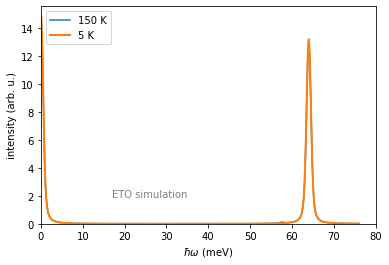

In [17]:
########### plot neutron spectrum

hw = np.linspace(-5,76,400)
intens1 = Pr.normalizedNeutronSpectrum(hw, Temp=5, ResFunc= lambda x: 1, gamma = 0.5)
intens2 = Pr.normalizedNeutronSpectrum(hw, Temp=150, ResFunc= lambda x: 1, gamma = 0.5)

plt.figure()
plt.plot(hw, intens2, label='150 K')
plt.plot(hw, intens1, lw=2, label='5 K')

plt.ylim(0,)
plt.xlim(0,)
plt.xlabel('$\\hbar \\omega$ (meV)')
plt.ylabel('intensity (arb. u.)')
plt.legend()
plt.text(17,1.9,'ETO simulation', color='grey')

In [18]:
ion = 'Er3+'

def zeemansplitting(obj, Field):
    '''Calculate eigenvalues of CEF spectrum in field'''

     # A) Define magnetic Hamiltonian
    muB = 5.7883818012e-2  # meV/T
    #mu0 = np.pi*4e-7       # T*m/A
    JdotB = muB*(Field[0]*cef.Operator.Jx(obj.J) + Field[1]*cef.Operator.Jy(obj.J) +\
                 Field[2]*cef.Operator.Jz(obj.J))*cef.LandeGFactor(ion)
    # B) Diagonalize full Hamiltonian
    oldH = np.sum([a*b for a,b in zip(obj.O, obj.B)], axis=0)
    print(oldH)
    obj.diagonalize(oldH + JdotB.O)
    return obj.eigenvalues


Bfield = np.linspace(0,17,300)
# Calculate eigenvalues for each field
CalcEvs_a, CalcEvs_b, CalcEvs_c = [], [], []
for B in Bfield:
    CalcEvs_a.append(zeemansplitting(Pr, [B,0,0]))
    CalcEvs_b.append(zeemansplitting(Pr, [0,B,0]))
    CalcEvs_c.append(zeemansplitting(Pr, [0,0,B]))
CalcEvs_a = np.array(CalcEvs_a)
CalcEvs_b = np.array(CalcEvs_b)
CalcEvs_c = np.array(CalcEvs_c)

[[ 4.07906100e+01  0.00000000e+00  0.00000000e+00  3.03169385e+02
   0.00000000e+00  0.00000000e+00  3.82028533e+00  0.00000000e+00
   0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
   0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00]
 [ 0.00000000e+00 -2.06492580e+01  0.00000000e+00  0.00000000e+00
   4.39472159e+02  0.00000000e+00  0.00000000e+00  7.82925514e+00
   0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
   0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00]
 [ 0.00000000e+00  0.00000000e+00 -2.25634860e+01  0.00000000e+00
   0.00000000e+00  4.81310710e+02  0.00000000e+00  0.00000000e+00
   1.18367212e+01  0.00000000e+00  0.00000000e+00  0.00000000e+00
   0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00]
 [ 3.03169385e+02  0.00000000e+00  0.00000000e+00 -8.31623400e+00
   0.00000000e+00  0.00000000e+00  4.39470031e+02  0.00000000e+00
   0.00000000e+00  1.50442100e+01  0.00000000e+00  0.00000000e+00
   0.00

[[ 4.07906100e+01  0.00000000e+00  0.00000000e+00  3.03169385e+02
   0.00000000e+00  0.00000000e+00  3.82028533e+00  0.00000000e+00
   0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
   0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00]
 [ 0.00000000e+00 -2.06492580e+01  0.00000000e+00  0.00000000e+00
   4.39472159e+02  0.00000000e+00  0.00000000e+00  7.82925514e+00
   0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
   0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00]
 [ 0.00000000e+00  0.00000000e+00 -2.25634860e+01  0.00000000e+00
   0.00000000e+00  4.81310710e+02  0.00000000e+00  0.00000000e+00
   1.18367212e+01  0.00000000e+00  0.00000000e+00  0.00000000e+00
   0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00]
 [ 3.03169385e+02  0.00000000e+00  0.00000000e+00 -8.31623400e+00
   0.00000000e+00  0.00000000e+00  4.39470031e+02  0.00000000e+00
   0.00000000e+00  1.50442100e+01  0.00000000e+00  0.00000000e+00
   0.00

[[ 4.07906100e+01  0.00000000e+00  0.00000000e+00  3.03169385e+02
   0.00000000e+00  0.00000000e+00  3.82028533e+00  0.00000000e+00
   0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
   0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00]
 [ 0.00000000e+00 -2.06492580e+01  0.00000000e+00  0.00000000e+00
   4.39472159e+02  0.00000000e+00  0.00000000e+00  7.82925514e+00
   0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
   0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00]
 [ 0.00000000e+00  0.00000000e+00 -2.25634860e+01  0.00000000e+00
   0.00000000e+00  4.81310710e+02  0.00000000e+00  0.00000000e+00
   1.18367212e+01  0.00000000e+00  0.00000000e+00  0.00000000e+00
   0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00]
 [ 3.03169385e+02  0.00000000e+00  0.00000000e+00 -8.31623400e+00
   0.00000000e+00  0.00000000e+00  4.39470031e+02  0.00000000e+00
   0.00000000e+00  1.50442100e+01  0.00000000e+00  0.00000000e+00
   0.00

[[ 4.07906100e+01  0.00000000e+00  0.00000000e+00  3.03169385e+02
   0.00000000e+00  0.00000000e+00  3.82028533e+00  0.00000000e+00
   0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
   0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00]
 [ 0.00000000e+00 -2.06492580e+01  0.00000000e+00  0.00000000e+00
   4.39472159e+02  0.00000000e+00  0.00000000e+00  7.82925514e+00
   0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
   0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00]
 [ 0.00000000e+00  0.00000000e+00 -2.25634860e+01  0.00000000e+00
   0.00000000e+00  4.81310710e+02  0.00000000e+00  0.00000000e+00
   1.18367212e+01  0.00000000e+00  0.00000000e+00  0.00000000e+00
   0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00]
 [ 3.03169385e+02  0.00000000e+00  0.00000000e+00 -8.31623400e+00
   0.00000000e+00  0.00000000e+00  4.39470031e+02  0.00000000e+00
   0.00000000e+00  1.50442100e+01  0.00000000e+00  0.00000000e+00
   0.00

[[ 4.07906100e+01  0.00000000e+00  0.00000000e+00  3.03169385e+02
   0.00000000e+00  0.00000000e+00  3.82028533e+00  0.00000000e+00
   0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
   0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00]
 [ 0.00000000e+00 -2.06492580e+01  0.00000000e+00  0.00000000e+00
   4.39472159e+02  0.00000000e+00  0.00000000e+00  7.82925514e+00
   0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
   0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00]
 [ 0.00000000e+00  0.00000000e+00 -2.25634860e+01  0.00000000e+00
   0.00000000e+00  4.81310710e+02  0.00000000e+00  0.00000000e+00
   1.18367212e+01  0.00000000e+00  0.00000000e+00  0.00000000e+00
   0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00]
 [ 3.03169385e+02  0.00000000e+00  0.00000000e+00 -8.31623400e+00
   0.00000000e+00  0.00000000e+00  4.39470031e+02  0.00000000e+00
   0.00000000e+00  1.50442100e+01  0.00000000e+00  0.00000000e+00
   0.00

[[ 4.07906100e+01  0.00000000e+00  0.00000000e+00  3.03169385e+02
   0.00000000e+00  0.00000000e+00  3.82028533e+00  0.00000000e+00
   0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
   0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00]
 [ 0.00000000e+00 -2.06492580e+01  0.00000000e+00  0.00000000e+00
   4.39472159e+02  0.00000000e+00  0.00000000e+00  7.82925514e+00
   0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
   0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00]
 [ 0.00000000e+00  0.00000000e+00 -2.25634860e+01  0.00000000e+00
   0.00000000e+00  4.81310710e+02  0.00000000e+00  0.00000000e+00
   1.18367212e+01  0.00000000e+00  0.00000000e+00  0.00000000e+00
   0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00]
 [ 3.03169385e+02  0.00000000e+00  0.00000000e+00 -8.31623400e+00
   0.00000000e+00  0.00000000e+00  4.39470031e+02  0.00000000e+00
   0.00000000e+00  1.50442100e+01  0.00000000e+00  0.00000000e+00
   0.00

  -3.03169385e+02  0.00000000e+00  0.00000000e+00  4.07906100e+01]]
[[ 4.07906100e+01  0.00000000e+00  0.00000000e+00  3.03169385e+02
   0.00000000e+00  0.00000000e+00  3.82028533e+00  0.00000000e+00
   0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
   0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00]
 [ 0.00000000e+00 -2.06492580e+01  0.00000000e+00  0.00000000e+00
   4.39472159e+02  0.00000000e+00  0.00000000e+00  7.82925514e+00
   0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
   0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00]
 [ 0.00000000e+00  0.00000000e+00 -2.25634860e+01  0.00000000e+00
   0.00000000e+00  4.81310710e+02  0.00000000e+00  0.00000000e+00
   1.18367212e+01  0.00000000e+00  0.00000000e+00  0.00000000e+00
   0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00]
 [ 3.03169385e+02  0.00000000e+00  0.00000000e+00 -8.31623400e+00
   0.00000000e+00  0.00000000e+00  4.39470031e+02  0.00000000e+00
   0.

  -3.03169385e+02  0.00000000e+00  0.00000000e+00  4.07906100e+01]]
[[ 4.07906100e+01  0.00000000e+00  0.00000000e+00  3.03169385e+02
   0.00000000e+00  0.00000000e+00  3.82028533e+00  0.00000000e+00
   0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
   0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00]
 [ 0.00000000e+00 -2.06492580e+01  0.00000000e+00  0.00000000e+00
   4.39472159e+02  0.00000000e+00  0.00000000e+00  7.82925514e+00
   0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
   0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00]
 [ 0.00000000e+00  0.00000000e+00 -2.25634860e+01  0.00000000e+00
   0.00000000e+00  4.81310710e+02  0.00000000e+00  0.00000000e+00
   1.18367212e+01  0.00000000e+00  0.00000000e+00  0.00000000e+00
   0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00]
 [ 3.03169385e+02  0.00000000e+00  0.00000000e+00 -8.31623400e+00
   0.00000000e+00  0.00000000e+00  4.39470031e+02  0.00000000e+00
   0.

[[ 4.07906100e+01  0.00000000e+00  0.00000000e+00  3.03169385e+02
   0.00000000e+00  0.00000000e+00  3.82028533e+00  0.00000000e+00
   0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
   0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00]
 [ 0.00000000e+00 -2.06492580e+01  0.00000000e+00  0.00000000e+00
   4.39472159e+02  0.00000000e+00  0.00000000e+00  7.82925514e+00
   0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
   0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00]
 [ 0.00000000e+00  0.00000000e+00 -2.25634860e+01  0.00000000e+00
   0.00000000e+00  4.81310710e+02  0.00000000e+00  0.00000000e+00
   1.18367212e+01  0.00000000e+00  0.00000000e+00  0.00000000e+00
   0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00]
 [ 3.03169385e+02  0.00000000e+00  0.00000000e+00 -8.31623400e+00
   0.00000000e+00  0.00000000e+00  4.39470031e+02  0.00000000e+00
   0.00000000e+00  1.50442100e+01  0.00000000e+00  0.00000000e+00
   0.00

[[ 4.07906100e+01  0.00000000e+00  0.00000000e+00  3.03169385e+02
   0.00000000e+00  0.00000000e+00  3.82028533e+00  0.00000000e+00
   0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
   0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00]
 [ 0.00000000e+00 -2.06492580e+01  0.00000000e+00  0.00000000e+00
   4.39472159e+02  0.00000000e+00  0.00000000e+00  7.82925514e+00
   0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
   0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00]
 [ 0.00000000e+00  0.00000000e+00 -2.25634860e+01  0.00000000e+00
   0.00000000e+00  4.81310710e+02  0.00000000e+00  0.00000000e+00
   1.18367212e+01  0.00000000e+00  0.00000000e+00  0.00000000e+00
   0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00]
 [ 3.03169385e+02  0.00000000e+00  0.00000000e+00 -8.31623400e+00
   0.00000000e+00  0.00000000e+00  4.39470031e+02  0.00000000e+00
   0.00000000e+00  1.50442100e+01  0.00000000e+00  0.00000000e+00
   0.00

[[ 4.07906100e+01  0.00000000e+00  0.00000000e+00  3.03169385e+02
   0.00000000e+00  0.00000000e+00  3.82028533e+00  0.00000000e+00
   0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
   0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00]
 [ 0.00000000e+00 -2.06492580e+01  0.00000000e+00  0.00000000e+00
   4.39472159e+02  0.00000000e+00  0.00000000e+00  7.82925514e+00
   0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
   0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00]
 [ 0.00000000e+00  0.00000000e+00 -2.25634860e+01  0.00000000e+00
   0.00000000e+00  4.81310710e+02  0.00000000e+00  0.00000000e+00
   1.18367212e+01  0.00000000e+00  0.00000000e+00  0.00000000e+00
   0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00]
 [ 3.03169385e+02  0.00000000e+00  0.00000000e+00 -8.31623400e+00
   0.00000000e+00  0.00000000e+00  4.39470031e+02  0.00000000e+00
   0.00000000e+00  1.50442100e+01  0.00000000e+00  0.00000000e+00
   0.00

[[ 4.07906100e+01  0.00000000e+00  0.00000000e+00  3.03169385e+02
   0.00000000e+00  0.00000000e+00  3.82028533e+00  0.00000000e+00
   0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
   0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00]
 [ 0.00000000e+00 -2.06492580e+01  0.00000000e+00  0.00000000e+00
   4.39472159e+02  0.00000000e+00  0.00000000e+00  7.82925514e+00
   0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
   0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00]
 [ 0.00000000e+00  0.00000000e+00 -2.25634860e+01  0.00000000e+00
   0.00000000e+00  4.81310710e+02  0.00000000e+00  0.00000000e+00
   1.18367212e+01  0.00000000e+00  0.00000000e+00  0.00000000e+00
   0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00]
 [ 3.03169385e+02  0.00000000e+00  0.00000000e+00 -8.31623400e+00
   0.00000000e+00  0.00000000e+00  4.39470031e+02  0.00000000e+00
   0.00000000e+00  1.50442100e+01  0.00000000e+00  0.00000000e+00
   0.00

  -3.03169385e+02  0.00000000e+00  0.00000000e+00  4.07906100e+01]]
[[ 4.07906100e+01  0.00000000e+00  0.00000000e+00  3.03169385e+02
   0.00000000e+00  0.00000000e+00  3.82028533e+00  0.00000000e+00
   0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
   0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00]
 [ 0.00000000e+00 -2.06492580e+01  0.00000000e+00  0.00000000e+00
   4.39472159e+02  0.00000000e+00  0.00000000e+00  7.82925514e+00
   0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
   0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00]
 [ 0.00000000e+00  0.00000000e+00 -2.25634860e+01  0.00000000e+00
   0.00000000e+00  4.81310710e+02  0.00000000e+00  0.00000000e+00
   1.18367212e+01  0.00000000e+00  0.00000000e+00  0.00000000e+00
   0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00]
 [ 3.03169385e+02  0.00000000e+00  0.00000000e+00 -8.31623400e+00
   0.00000000e+00  0.00000000e+00  4.39470031e+02  0.00000000e+00
   0.

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



[[ 4.07906100e+01  0.00000000e+00  0.00000000e+00  3.03169385e+02
   0.00000000e+00  0.00000000e+00  3.82028533e+00  0.00000000e+00
   0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
   0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00]
 [ 0.00000000e+00 -2.06492580e+01  0.00000000e+00  0.00000000e+00
   4.39472159e+02  0.00000000e+00  0.00000000e+00  7.82925514e+00
   0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
   0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00]
 [ 0.00000000e+00  0.00000000e+00 -2.25634860e+01  0.00000000e+00
   0.00000000e+00  4.81310710e+02  0.00000000e+00  0.00000000e+00
   1.18367212e+01  0.00000000e+00  0.00000000e+00  0.00000000e+00
   0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00]
 [ 3.03169385e+02  0.00000000e+00  0.00000000e+00 -8.31623400e+00
   0.00000000e+00  0.00000000e+00  4.39470031e+02  0.00000000e+00
   0.00000000e+00  1.50442100e+01  0.00000000e+00  0.00000000e+00
   0.00

In [6]:
print(CalcEvs_c[0])
print(Pr.eigenvalues)

[ 0.          0.          6.25127307  6.25127307  7.51455465  7.51455465
 13.73480825 13.73480825 44.85326105 44.85326105 47.63429374 47.63429374
 52.57643738 52.57643738 69.47506854 69.47506854]
[ 0.          1.74180757  6.30119575 11.29781153 12.8786955  12.90523272
 14.21629502 22.79887627 48.33604152 48.33789334 49.78197103 52.8410582
 56.3290906  56.99803572 64.55750337 81.72262384]


In [19]:
print(CalcEvs_b.T.shape)
print(Bfield.shape)

(16, 300)
(300,)


Value at Bfield=0 for curve 1: 0.00 cm^-1
Value at Bfield=0 for curve 2: 516.47 cm^-1
Value at Bfield=0 for curve 3: 516.47 cm^-1
Value at Bfield=0 for curve 4: 980.87 cm^-1
Value at Bfield=0 for curve 5: 980.87 cm^-1
Value at Bfield=0 for curve 6: 4619.47 cm^-1
Value at Bfield=0 for curve 7: 4619.47 cm^-1
Value at Bfield=0 for curve 8: 4988.19 cm^-1
Value at Bfield=0 for curve 9: 4988.19 cm^-1
Value at Bfield=0 for curve 10: 8572.16 cm^-1
Value at Bfield=0 for curve 11: 8572.16 cm^-1
Value at Bfield=0 for curve 12: 9140.96 cm^-1
Value at Bfield=0 for curve 13: 9140.96 cm^-1
Value at Bfield=0 for curve 14: 9476.83 cm^-1
Value at Bfield=0 for curve 15: 9476.83 cm^-1


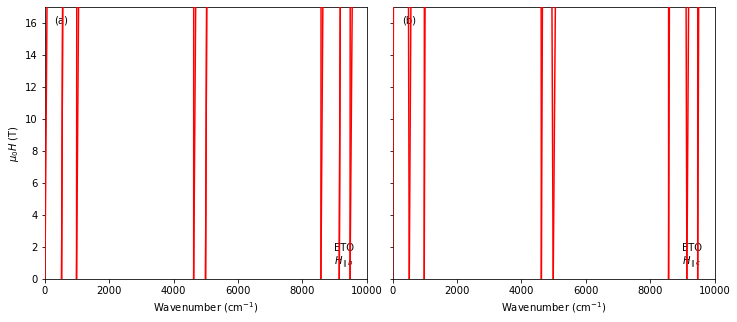

In [20]:
f, ax = plt.subplots(1,2, figsize=(12,5), sharex=True, sharey=True)
mevtocm = 8.066
norm = plt.Normalize(0, 6)

for i, cev in enumerate(CalcEvs_b.T):
    if i > 0:
        ax[0].plot(cev*mevtocm, Bfield, color='r',zorder=10)#pf.cpal1[0]
        ax[1].plot(CalcEvs_c.T[i]*mevtocm, Bfield, color='r',zorder=10)#pf.cpal1[0]
        value_at_zero = CalcEvs_c.T[i, 0] * mevtocm
        print(f'Value at Bfield=0 for curve {i}: {value_at_zero:.2f} cm^-1')
ax[0].set_ylabel('$\\mu_0 H$ (T)')
abc = 'abc'
for i in range(len(ax)):
    ax[i].set_xlim(0,10000)
    ax[i].set_ylim(0,17)
    ax[i].set_xlabel('Wavenumber (cm$^{-1}$)')
    ax[i].text(0.96,0.03, 'ETO\n$H_{\\parallel '+abc[i+1]+'}$', 
                ha='right', va='bottom', transform=ax[i].transAxes)
    plt_label = ['(a)','(b)','(c)']
    ax[i].text(0.03,0.97, plt_label[i], transform=ax[i].transAxes, va='top')#pf.parSubPlotLabel(i)
# ax[0].set_title('Calculated CsErSe$_2$ CEF eigenvalues', fontsize=15)

f.subplots_adjust(wspace=0.08)

Text(0, 0.5, '$\\mu_0 H_{\\parallel c}$ (T)')

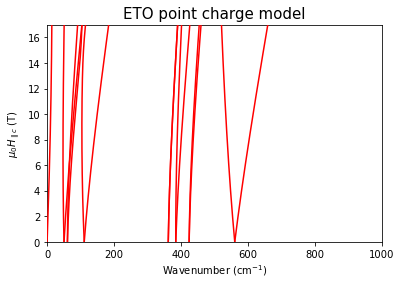

In [13]:
f, ax = plt.subplots()
for i, cev in enumerate(CalcEvs_b.T):
    if i > 0:
        ax.plot(CalcEvs_c.T[i]*mevtocm, Bfield, color='r',zorder=10) #pf.cpal1[0]

ax.set_xlim(0,1000)
ax.set_ylim(0,17)
ax.set_xlabel('Wavenumber (cm$^{-1}$)')
ax.set_title('ETO point charge model', fontsize=15)
ax.set_ylabel('$\\mu_0 H_{\\parallel c}$ (T)')

#plt.savefig('CsPrSe2_C-axis-splitting.pdf')

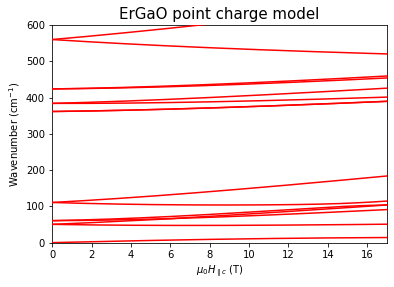

In [12]:
f, ax = plt.subplots()
for i, cev in enumerate(CalcEvs_b.T):
    if i > 0:
        ax.plot(Bfield, CalcEvs_c.T[i]*mevtocm, color='r',zorder=10) #pf.cpal1[0]

ax.set_ylim(0,600)
ax.set_xlim(0,17)
ax.set_ylabel('Wavenumber (cm$^{-1}$)')
ax.set_title('ErGaO point charge model', fontsize=15)
ax.set_xlabel('$\\mu_0 H_{\\parallel c}$ (T)')

from scipy.io import savemat
plot_data = {
    'Bfield': Bfield,
    'CalcEvs_c': CalcEvs_c,
    'mevtocm': mevtocm
}

savemat('ETO_data.mat', plot_data)
#plt.savefig('EGO_C-axis-splitting.png')
